In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
star = cr.Star(toiid=763)

Target: TOI 763
Searching Vizier: (194.468 -39.7581) with radius=3.0 arcsec


In [3]:
gaia_params = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(194.468 -39.7581) within 3.0 arcsec.


## stellar parameters from literature

In [4]:
import numpy as np

cols = "Teff logg __Fe_H_ Rad Mass vsini".split()
params={}
for col in cols:
    pars = star.query_vizier_param(col)
    mean = np.nanmean(list(pars.values()))
    err = np.nanstd(list(pars.values()))
    
    params[col] = (mean,err)
    print(f"{col}: {mean:.2f}, {err:.2f}")

Found 2 references with Teff
Teff: 5410.50, 21.50
Found 1 references with logg
logg: 4.35, 0.00
Found 0 references with __Fe_H_
__Fe_H_: nan, nan
Found 2 references with Rad
Rad: 0.93, 0.03
Found 1 references with Mass
Mass: 0.97, 0.00
Found 0 references with vsini
vsini: nan, nan


## lightcurves

In [5]:
sc = cr.ShortCadence(toiid=763)
lc = sc.get_lc()

Target: TOI 763
Available sectors: [10]
Using sector=10.
Using TESS short cadence.

Searching lightcurvefile for TIC 178819686 (sector 10)
Found 1 lightcurves


Using period=5.6048 d, epoch=1572.10 BTJD, duration=2.78 hr
Using biweight filter with window_length=0.35 day


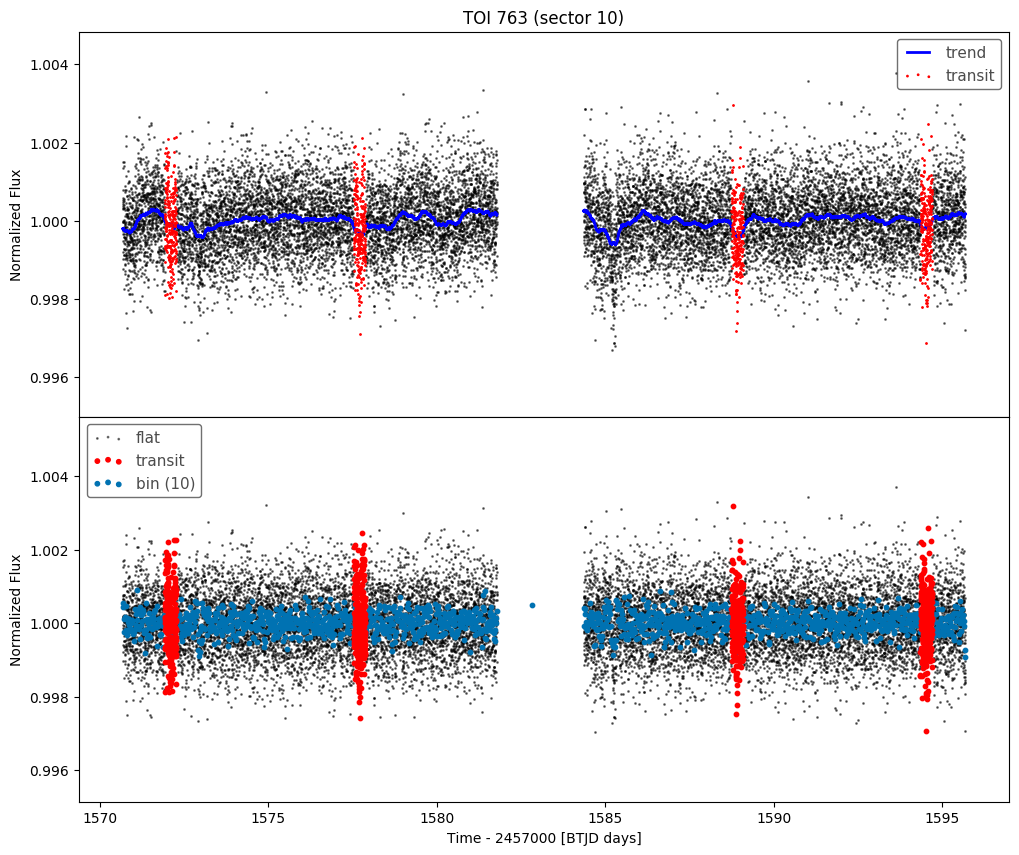

In [6]:
fig = sc.plot_trend_flat_lcs(lc)

In [7]:
flat = sc.get_flat_lc(lc)

Using biweight filter with window_length=0.35 day


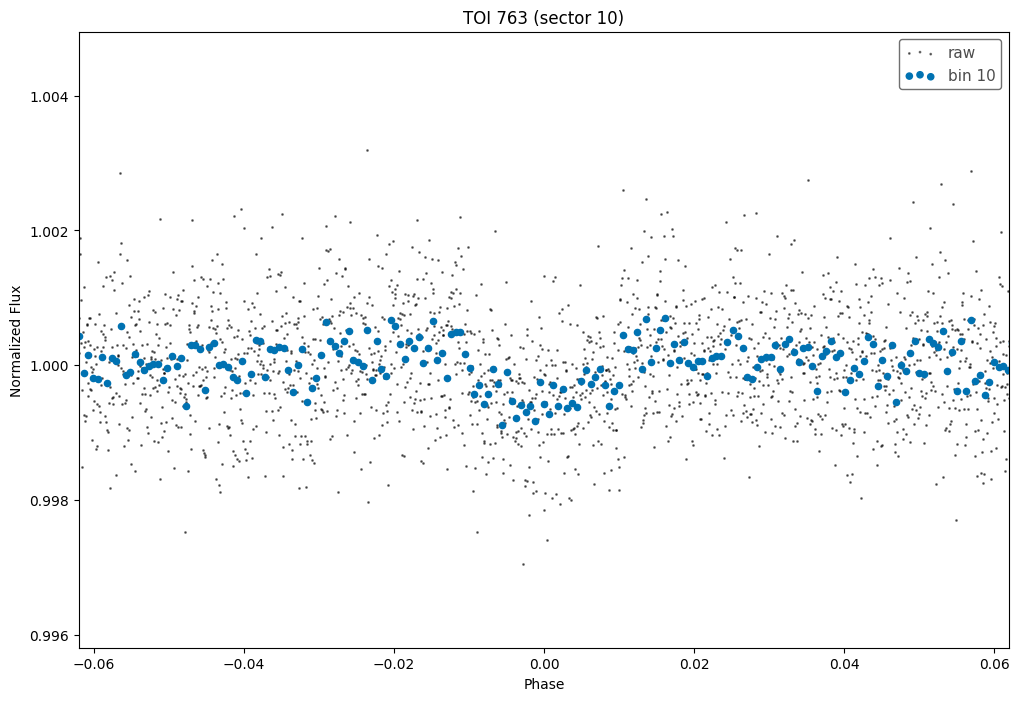

In [8]:
ax = sc.plot_fold_lc(flat)

## isochrones modeling

In [12]:
#include spectroscopic priors from paper
iso_params = star.get_iso_params(teff=(5450, 60),
                                logg=(4.45, 0.050),
                                feh=(0.01, 0.05),
                                add_jhk=True
                               )

Querying TIC catalog for ra,dec=(194.468 -39.7581) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


In [13]:
iso_model = star.init_isochrones(iso_params)

{'teff': [5450.0, 60.0], 'G': [9.999151, 0.01], 'BP': [10.38316, 0.01], 'RP': [9.479095, 0.01], 'parallax': [10.483664472668947, 0.1115903836064159], 'feh': [0.01, 0.05], 'logg': [4.45, 0.05], 'J': [8.858, 0.029], 'H': [8.554, 0.023], 'K': [8.49, 0.021], 'Tess': [9.5275, 0.01]}


In [14]:
star.isochrones_model.observed_quantities

['G_mag',
 'BP_mag',
 'RP_mag',
 'J_mag',
 'H_mag',
 'K_mag',
 'parallax',
 'feh',
 'logg']

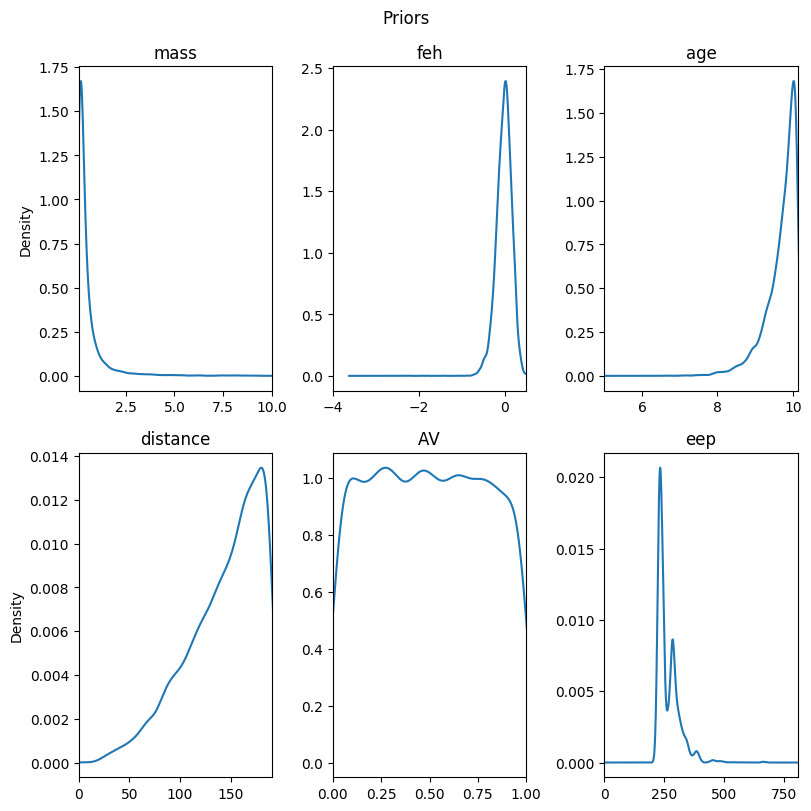

In [15]:
fig = star.plot_isochrones_priors()

In [16]:
iso_model = star.run_isochrones(overwrite=True)

Gaia and TIC catalog cross-match succeeded.
Using previously initialized model.
method: Nested Sampling
Done.


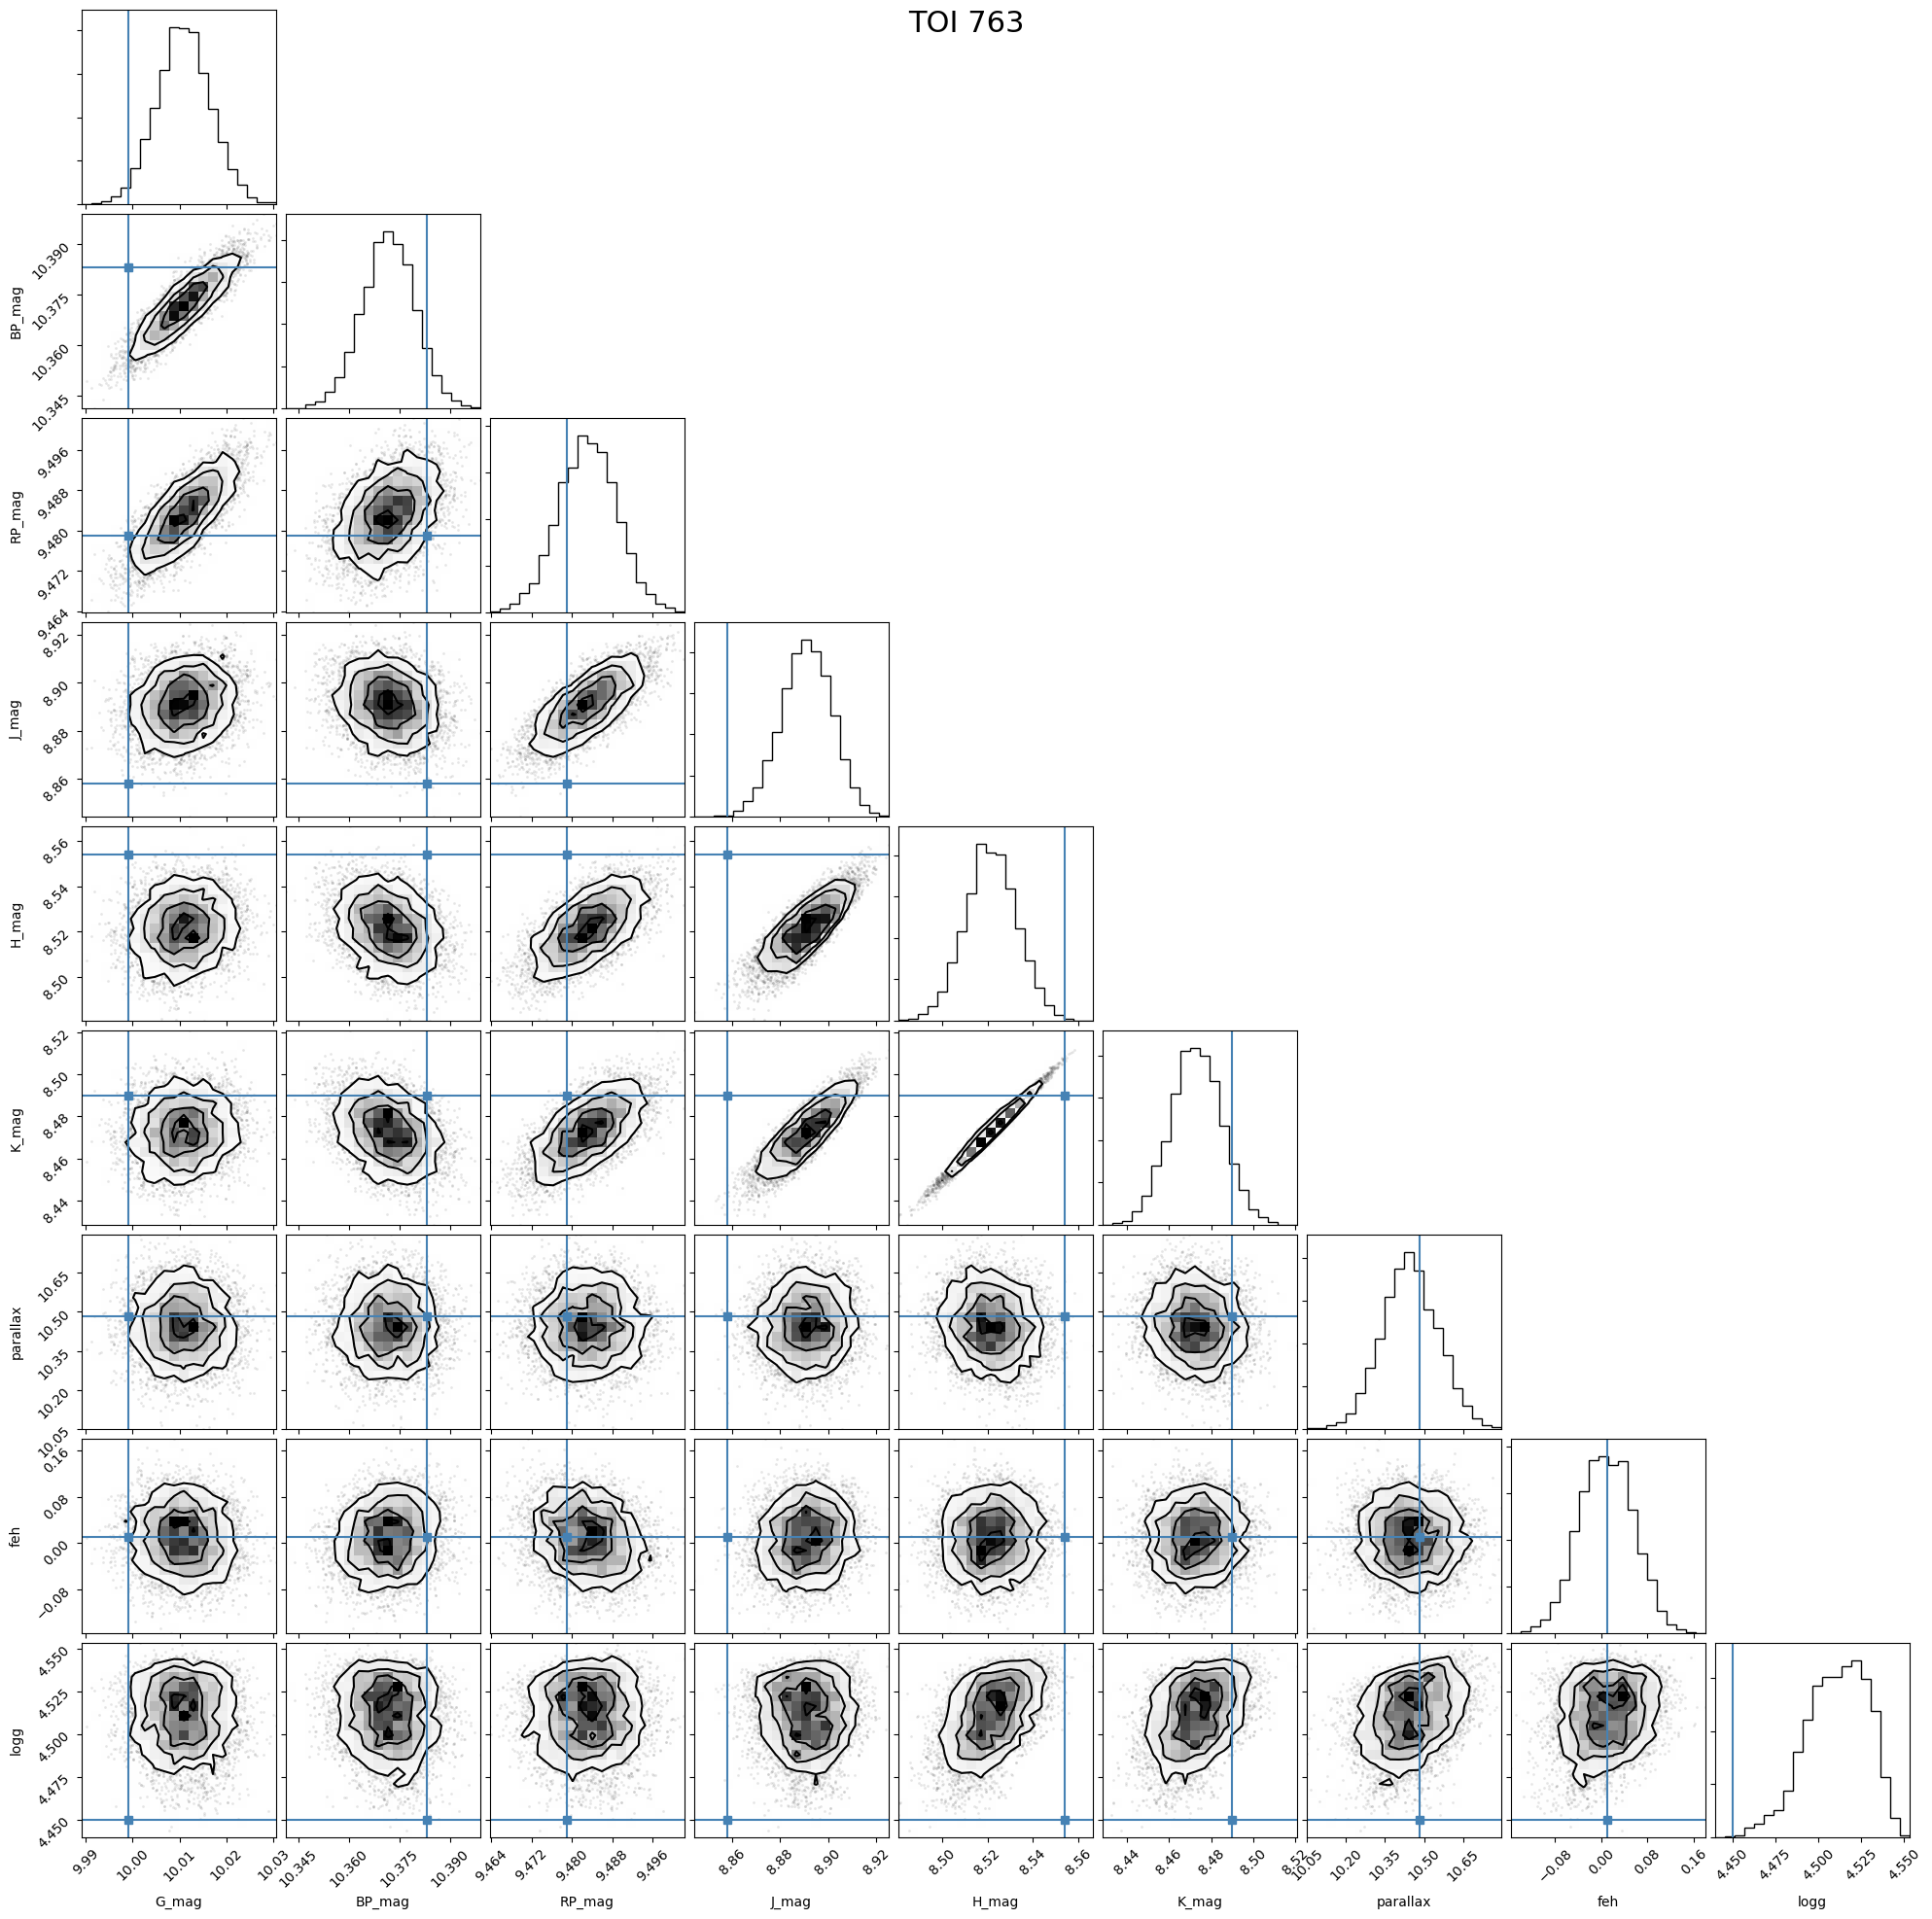

In [10]:
fig=star.plot_corner(posterior="observed")

In [11]:
iso_model.evidence

  analysing data from ./chains/TOI 763-mist-single-.txt


(-77.10395688251606, 0.48687413825710063)

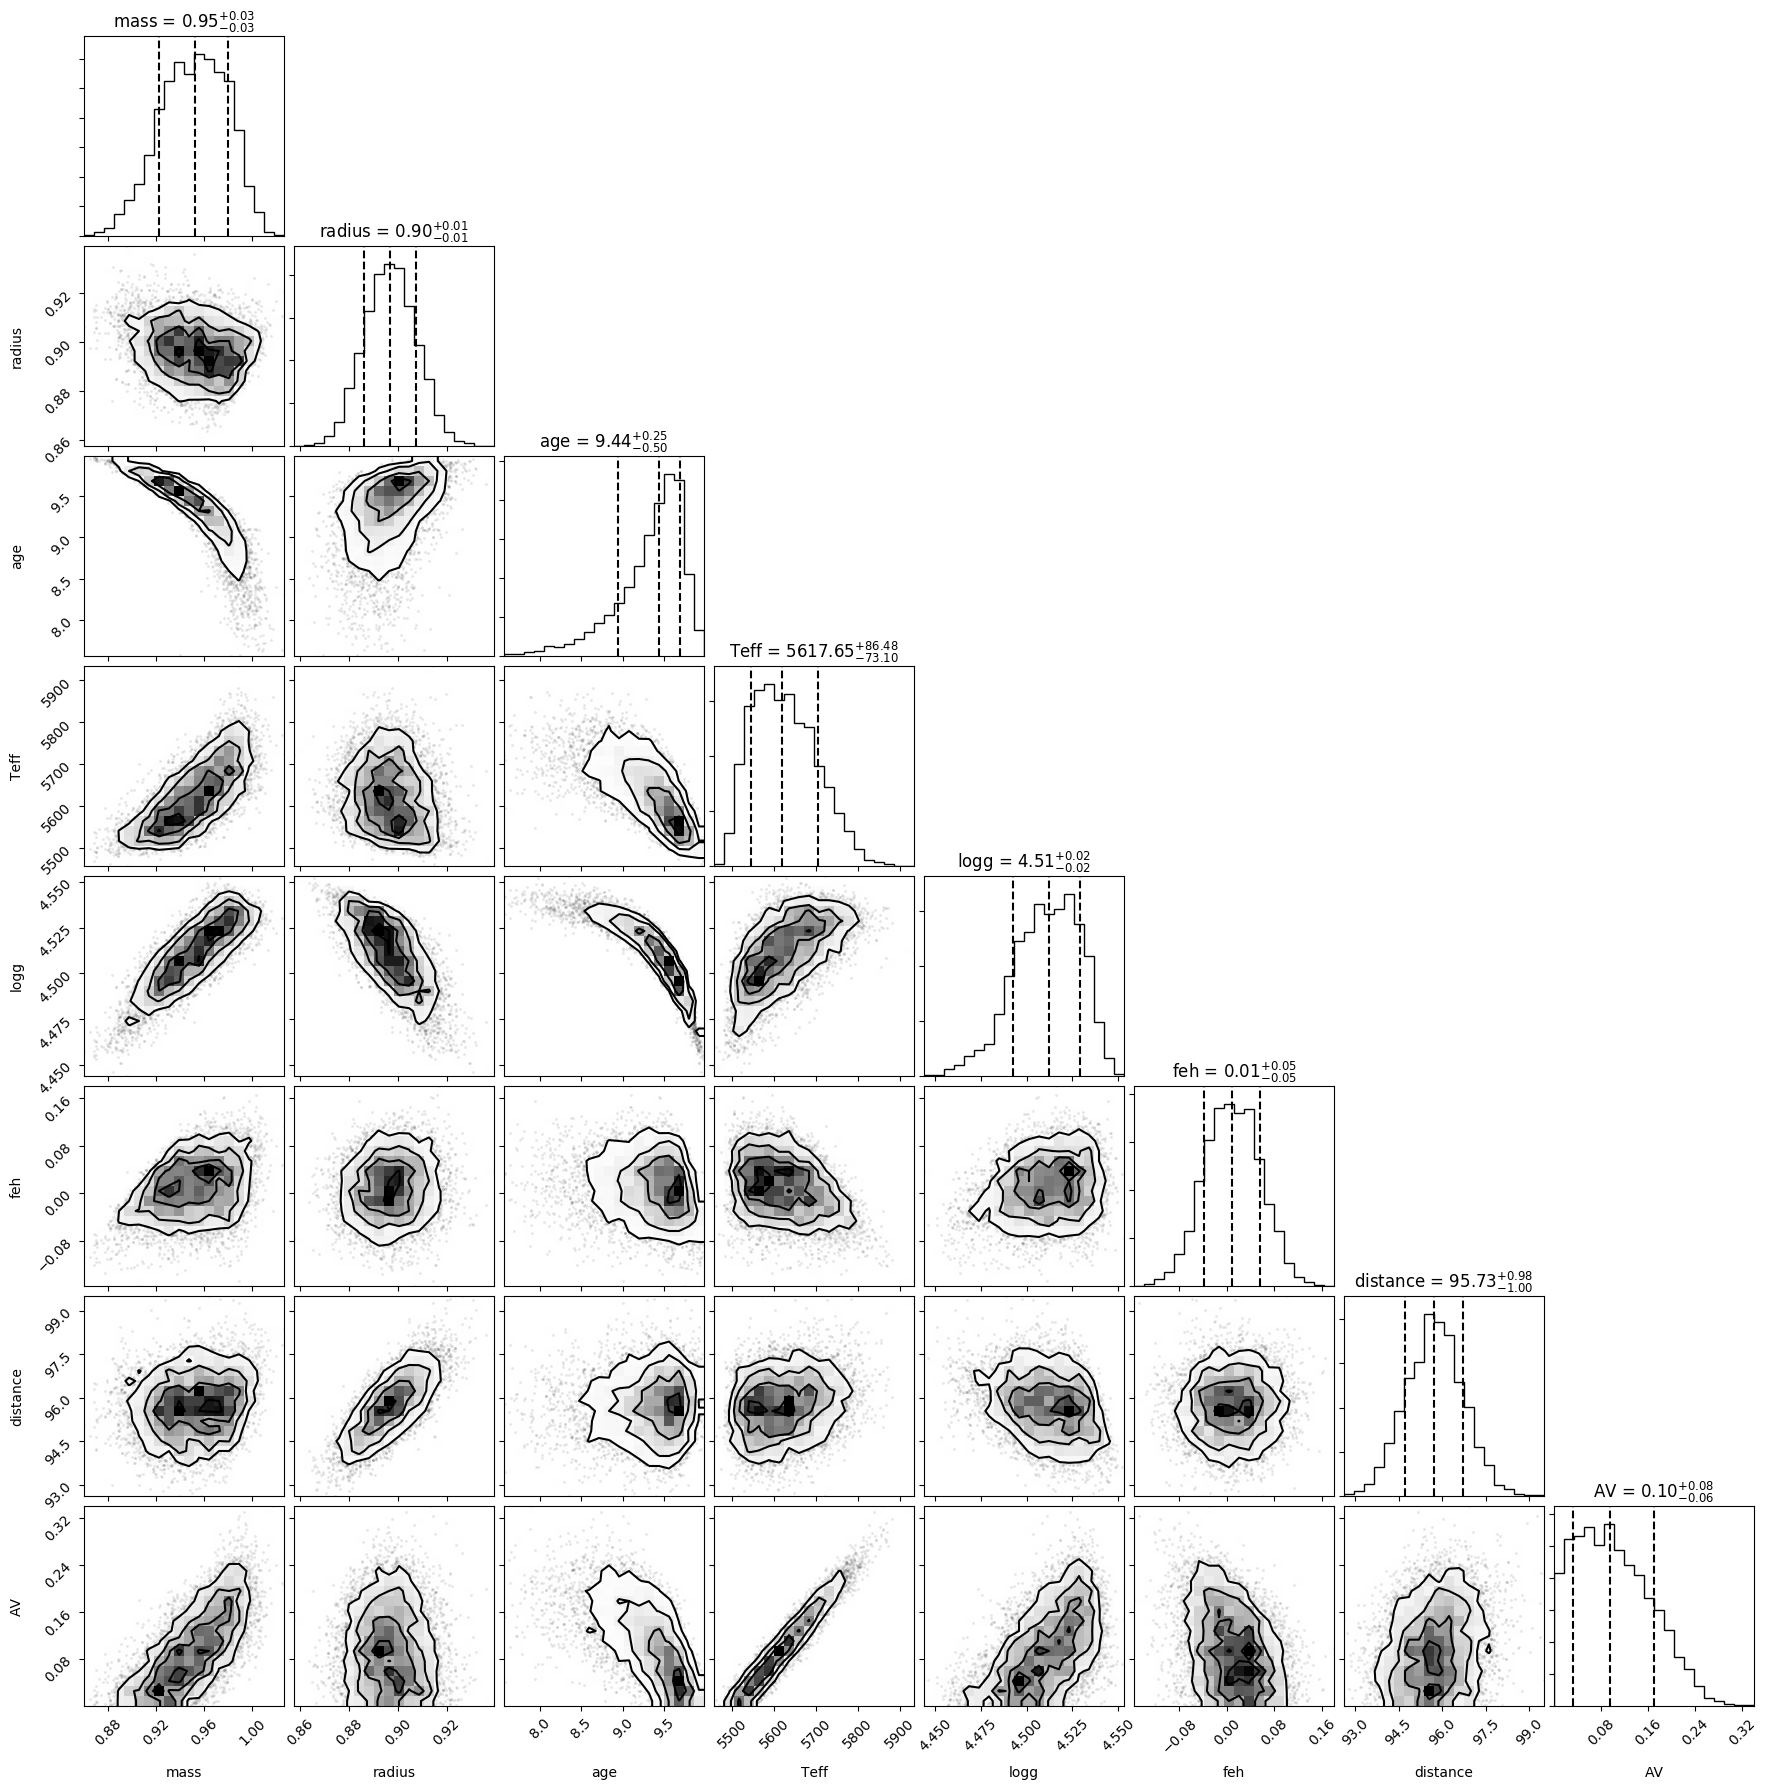

In [12]:
fig = star.plot_corner(posterior='physical')

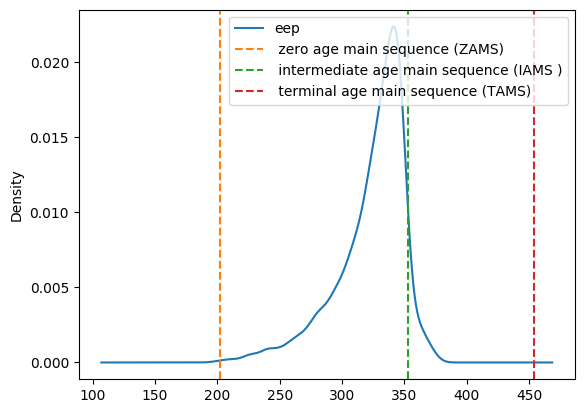

In [13]:
star.plot_posterior_eep()

In [14]:
iso_model.evidence

  analysing data from ./chains/TOI 763-mist-single-.txt


(-77.10395688251606, 0.48687413825710063)

## MAST data

In [15]:
mast_table = star.query_mast()
mast_table.head()

Searching MAST for (194.468 -39.7581) with radius=3.0 arcsec
Available data: ['TESS/TESS', 'HLSP/TESS', 'GALEX/NUV'] in ['Optical', 'UV']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0010-2-3,...,NaN,10.0,POLYGON 197.64115700 -39.52620700 192.75015200...,NaN,NaN,PUBLIC,False,NaN,17000377462,0.0
1,science,TESS,SPOC,Photometer,TESS,TESS,Optical,178819686,NaN,tess2019085135100-s0010-0000000178819686-0140-s,...,NaN,10.0,CIRCLE ICRS 194.46855100 -39.75766800 0.00138889,NaN,mast:TESS/product/tess2019085135100-s0010-0000...,PUBLIC,False,NaN,17000341614,0.0
2,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0010-2-3-cal-0412-0160,NaN,hlsp_eleanor_tess_ffi_postcard-s0010-2-3-cal-0...,...,NaN,10.0,POLYGON ICRS 195.26983000 -39.42084200 195.056...,NaN,mast:HLSP/eleanor/postcards/s0010/2-3/hlsp_ele...,PUBLIC,False,NaN,18003873967,0.0
3,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0010-2-3-cal-0412-0214,NaN,hlsp_eleanor_tess_ffi_postcard-s0010-2-3-cal-0...,...,NaN,10.0,POLYGON ICRS 195.15870200 -39.69635900 194.942...,NaN,mast:HLSP/eleanor/postcards/s0010/2-3/hlsp_ele...,PUBLIC,False,NaN,18003867644,0.0
4,science,GALEX,AIS,GALEX,AIS,NUV,UV,AIS_471_1_63,NaN,6387487662386708480,...,AIS,NaN,CIRCLE ICRS 194.16277954 -39.95020047 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,PUBLIC,NaN,5885.0,1000042065,0.0


## ESO spectra

In [17]:
eso_table = star.query_eso()
eso_table

Searching ESO: (194.468 -39.7581) with diameter=3.0 arcsec
Available data:
Instrument Nspectra  
HARPS      9         

Found 9 ['HARPS'] spectra with SNR>1



,COLLECTION,TARGETNAME,s_ra,s_dec,APERTURE,em_min,em_max,SPECRP,SNR,t_min,t_max,CREATORDID,access_url,dp_id
0,HARPS,TOI-763,194.468343,-39.75790,0.999972,3.781500e-07,6.912260e-07,115000.0,63.4,58669.005258,58669.026091,ivo://eso.org/origfile?HARPS.2019-07-05T00:07:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-06T01:12:37.374
1,HARPS,TOI-763,194.468008,-39.75742,0.999972,3.781490e-07,6.912240e-07,115000.0,60.3,58676.997059,58677.017892,ivo://eso.org/origfile?HARPS.2019-07-12T23:55:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-14T01:20:03.468
2,HARPS,TOI-763,194.468454,-39.75737,0.999972,3.781470e-07,6.912230e-07,115000.0,56.3,58682.958121,58682.978955,ivo://eso.org/origfile?HARPS.2019-07-18T22:59:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-20T01:13:05.949
3,HARPS,TOI-763,194.467862,-39.75831,0.999972,3.781480e-07,6.912250e-07,115000.0,60.2,58670.023086,58670.043919,ivo://eso.org/origfile?HARPS.2019-07-06T00:33:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-07T01:09:21.123
4,HARPS,TOI-763,194.467684,-39.75752,0.999972,3.781490e-07,6.912240e-07,115000.0,53.4,58675.983465,58676.004299,ivo://eso.org/origfile?HARPS.2019-07-11T23:36:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-13T01:04:56.996
5,HARPS,TOI-763,194.467486,-39.75779,0.999972,3.781480e-07,6.912230e-07,115000.0,71.3,58679.020592,58679.041425,ivo://eso.org/origfile?HARPS.2019-07-15T00:29:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-16T01:16:01.475
6,HARPS,TOI-763,194.467817,-39.75768,0.999972,3.781490e-07,6.912230e-07,115000.0,55.2,58682.979312,58683.000145,ivo://eso.org/origfile?HARPS.2019-07-18T23:30:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-20T01:13:05.951
7,HARPS,TOI-763,194.467461,-39.75792,0.999972,3.781500e-07,6.912230e-07,115000.0,66.2,58694.974999,58694.995833,ivo://eso.org/origfile?HARPS.2019-07-30T23:23:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-08-01T01:16:54.872
8,HARPS,TOI-763,194.467240,-39.75819,0.999972,3.781490e-07,6.912250e-07,115000.0,74.5,58704.965807,58704.986641,ivo://eso.org/origfile?HARPS.2019-08-09T23:10:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-08-11T01:16:11.259


## HARPS bank RVs

In [18]:
harps_bank_table = star.query_harps_bank_table()
harps_bank_table

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

Nearest HARPS object is
HD113679: ra,dec=(13:05:52.8243,-38:30:59.990) @ d=119.28 arcmin



## cluster membership

In [19]:
star.get_cluster_membership() #not possible cluster member

Found 0 references with Assoc
ra: 8 matched
dec: 26 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 436 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member


## fov

In [17]:
tpf = sc.get_tpf()


Searching mast for TIC 178819686

1 tpf(s) found in sector(s) [10]
Using data from sector 10 only




In [20]:
gaia_params = sc.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(194.468 -39.7581) within 3.0 arcsec.


In [25]:
fig = cr.plot_gaia_sources_on_survey(tpf,
                                     target_gaiaid=sc.gaiaid,
                                     depth=sc.toi_depth*1e-6,
                                     fov_rad=180,
                                     survey='DSS2 Red'
                                    )

TimeoutError: Timeout limit of 600 exceeded.